# ASIGNACION 3
### JUAN DIEGO GIRALDO
### NICOLAS ARIZA



# Importamos librerias

In [90]:
import cufflinks as cf
import pandas as pd
import numpy as np
from IPython.display import display,HTML
cf.set_config_file(sharing='public', theme='ggplot',offline='True')
import plotly.express as px

# Problema de la Nube de Particulas

## 2D

### Tratamiento de datos 2D

In [2]:
data = pd.read_csv('datosmasas.csv')
data.head(0)
df_2d = data
del(df_2d['z'])


X_i_2d = pd.DataFrame()
masas_2d = pd.DataFrame()
X_i_2d['X'] = data['x']
X_i_2d['Y'] = data['y']

masas_2d['X'] = pd.DataFrame(data['masas'])
masas_2d['Y'] = pd.DataFrame(data['masas'])



momento_0_2d = pd.DataFrame()
momento_0_2d = masas_2d['X'].sum()
print(momento_0_2d)


4627.0


## Momento de orden 1 2D

In [3]:
n=len(data['particula'])    
media_X_i_2d = pd.DataFrame(X_i_2d.apply(np.sum))
media_X_i_2d =(media_X_i_2d.transpose()/n)
print(media_X_i_2d)

for i in range(0,1533):
    media_X_i_2d.loc[i]= [821.974,775.87]
    
momento_1_2d = pd.DataFrame()
momento_1_2d = (((masas_2d * X_i_2d).apply(np.sum)))/momento_0_2d

print('El momento de orden 1 o el centro de masas del sistema es:')
print(momento_1_2d)

            X           Y
0  821.973907  775.870189
El momento de orden 1 o el centro de masas del sistema es:
X    825.815215
Y    776.918522
dtype: float64


### Grafica 2D

In [4]:
df_2d.loc[1]=['Centro de masas',50,825.815,776.919]
fig5 = px.scatter(df_2d, x='x', y='y',color='masas',size = 'masas')
fig5.write_html("Nube de particulas con masas_2d.html")

fig5.show()

## Momento de orden 2 2D

In [5]:
X_2d = np.vstack((X_i_2d['X'], X_i_2d['Y'], masas_2d['X'] )).T

def cov_2d(x,y):
    xbar, ybar = x.mean(), y.mean()
    return ((np.sum(((x - xbar)*(y - ybar))))*momento_0_2d)/n
    
def cov_mat_2d(X_2d):
    return np.array([
                     [cov_2d(X_2d[0], X_2d[1]), cov_2d(X_2d[0], X_2d[2])],\
                     [cov_2d(X_2d[1], X_2d[1]), cov_2d(X_2d[1], X_2d[2])]\
                     ])
tensor_2d = pd.DataFrame(cov_mat_2d(X_2d.T))
print('El tensor de inecia en 2d es:')
print(tensor_2d)


El tensor de inecia en 2d es:
              0             1
0  8.925904e+08  53645.826130
1  9.448749e+08  14640.500177


### Autovalores y Autovectores 2D

In [6]:
Autovec_Autoval_2d = np.linalg.eig(tensor_2d)
print('El Auto vector es:',Autovec_Autoval_2d[0])
print('Los Auto valores son:\n',Autovec_Autoval_2d[1])

El Auto vector es: [ 8.92647232e+08 -4.21450071e+04]
Los Auto valores son:
 [[ 6.86725485e-01 -6.00984398e-05]
 [ 7.26916851e-01  9.99999998e-01]]


## Traemos y Procesamos los DataFrames de la media de los vectores y los vectores

In [142]:
data = pd.read_csv('datosmasas.csv')
path = 'GDP% 1960 a 2020.xlsx'
dt = pd.read_excel(path)
df = data
data.head(0)

X_i = pd.DataFrame()
masas = pd.DataFrame()
X_i['X'] = data['x']
X_i['Y'] = data['y']
X_i['Z'] = data['z']

masas['X'] = pd.DataFrame(data['masas'])
masas['Y'] = pd.DataFrame(data['masas'])
masas['Z'] = pd.DataFrame(data['masas'])



# Momento de orden 0

In [139]:
momento_0 = pd.DataFrame()
momento_0 = sum (data['masas'])
print('El Momento de orden 0 es:')
print(momento_0)



El Momento de orden 0 es:
4675.0


# Momento de orden 1 3D

In [138]:
momento_1 = pd.DataFrame()
momento_1 =  (((masas) *(X_i)).apply(np.sum))/momento_0

print('El momento de orden 1 o el centro de masas del sistema es:')
print(momento_1)

El momento de orden 1 o el centro de masas del sistema es:
X    825.815215
Y    776.918522
Z     15.503350
dtype: float64


### Grafica del centro de masa

In [141]:
df.loc[1]=['Centro de masas',50,825.815,776.919,15.503350]
fig = px.scatter_3d(df, x='x', y='y',z='z',color='masas',size = 'masas')
fig.write_html("Nube de particulas con masas.html")

fig.show()

# Momento de orden 2 (aka. Tensor de inercia)

In [143]:
X = np.vstack((X_i['X'], X_i['Y'], X_i['Z'])).T
print(X)
def cov(x,y):
    xbar, ybar = x.mean(), y.mean()
    return (np.sum(((x - xbar)*(y - ybar)))*momento_0/n)
    

def cov_mat(X):
    return np.array([\
                     [cov(X[0], X[1]), cov(X[0], X[2]), cov(X[0], X[2])]\
                     ,[cov(X[1], X[1]), cov(X[1], X[2]), cov(X[1], X[2])]\
                     ,[cov(X[2], X[1]), cov(X[2], X[2]), cov(X[2], X[2])]\
                     ])
tensor = pd.DataFrame(cov_mat(X.T))
print('El tensor de inecia es:')
print(tensor)

[[ -53.   79.  -91.]
 [  13. -142. -177.]
 [-109. -103. -120.]
 ...
 [1626. 1537.   96.]
 [1390. 1480.  160.]
 [1717. 1464.  -59.]]
El tensor de inecia es:
              0             1             2
0  9.018501e+08 -4.522675e+06 -4.522675e+06
1  9.546769e+08 -1.591416e+06 -1.591416e+06
2 -1.591416e+06  1.045176e+08  1.045176e+08


### Autovectores y Autovalores del Tensor de inercia

In [144]:
Autovec_Autoval = np.linalg.eig(tensor)
print('El Auto vector es:',Autovec_Autoval[0])
print('Los Auto valores son:\n',Autovec_Autoval[1])

El Auto vector es: [ 8.96417769e+08 -2.91320816e-08  1.08358513e+08]
Los Auto valores son:
 [[-6.82186770e-01 -5.47738569e-18  5.90557583e-03]
 [-7.25068150e-01  7.07106781e-01  3.68131851e-02]
 [-9.43259700e-02 -7.07106781e-01  9.99304715e-01]]


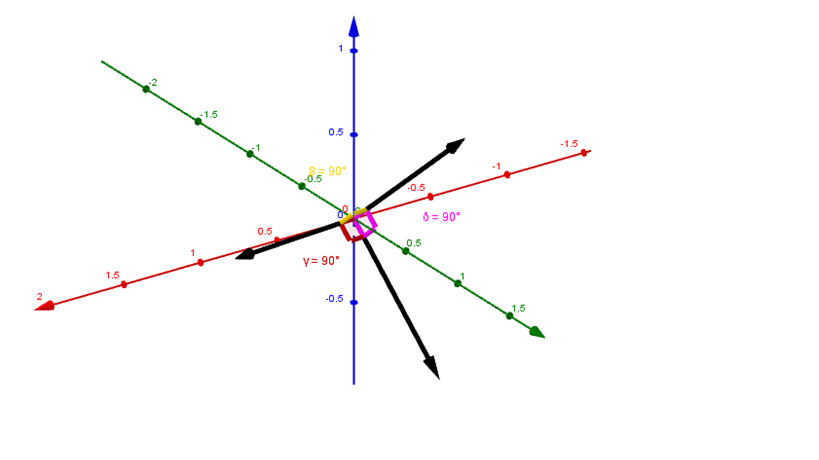

# Covarianza de varias variables en el % del PIB

#### Lectura de datos y organizacion en DataFrames

In [148]:
data2 = pd.read_excel('GDP% 1960 a 20202.xlsx')

X = np.vstack((data2['x'], data2['Military expenditure (% of GDP)'], \
               data2['Government expenditure on education, total (% of GDP)'],\
               data2['Research and development expenditure (% of GDP)'],\
               data2['Current health expenditure (% of GDP)']   ) ).T

X

array([[2.00500000e+03, 3.35287339e+00, 4.02098989e+00, 1.50860000e-01,
        6.06709814e+00],
       [2.00600000e+03, 3.27613064e+00, 3.91671991e+00, 1.49500000e-01,
        6.33551502e+00],
       [2.00700000e+03, 3.26673966e+00, 4.08301020e+00, 1.84550000e-01,
        6.49102831e+00],
       [2.00800000e+03, 3.74460644e+00, 3.93878007e+00, 2.01250000e-01,
        6.84192705e+00],
       [2.00900000e+03, 3.88535387e+00, 4.77651978e+00, 1.96080000e-01,
        7.31134653e+00],
       [2.01000000e+03, 3.64275560e+00, 4.83382988e+00, 1.95010000e-01,
        7.07130146e+00],
       [2.01100000e+03, 3.08161364e+00, 4.46608019e+00, 2.05950000e-01,
        6.78076839e+00],
       [2.01200000e+03, 3.15896024e+00, 4.37038994e+00, 2.33780000e-01,
        6.74599648e+00],
       [2.01300000e+03, 3.27440100e+00, 4.87855005e+00, 2.71110000e-01,
        7.01724052e+00],
       [2.01400000e+03, 3.10825885e+00, 4.62945986e+00, 3.05630000e-01,
        7.18553209e+00],
       [2.01500000e+03, 3.1099

## Calculo de la Covarianza y la Matriz de Covarianza

In [147]:
#Covarianza
def cov(x,y):
    ybar, xbar = y.mean(), x.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x)- 1)
    
# Covarianza matrix
def cov_mat(X):
    return np.array([\
                     [cov(X[1], X[1]), cov(X[1], X[2]), cov(X[1], X[3]), cov(X[1], X[4])]\
                     ,[cov(X[2], X[1]), cov(X[2], X[2]), cov(X[2], X[3]), cov(X[2], X[4])]\
                     ,[cov(X[3], X[1]), cov(X[3], X[2]), cov(X[3], X[3]), cov(X[3], X[4])]\
                     ,[cov(X[4], X[1]), cov(X[4], X[2]), cov(X[4], X[3]), cov(X[4], X[4])]\
                                    ])

data2

,x,Military expenditure (% of GDP),"Government expenditure on education, total (% of GDP)",Research and development expenditure (% of GDP),Current health expenditure (% of GDP)
0,2005,3.352873,4.02099,0.15086,6.067098
1,Centro de masas,50.000000,825.81500,776.91900,15.503350
2,2007,3.266740,4.08301,0.18455,6.491028
3,2008,3.744606,3.93878,0.20125,6.841927
4,2009,3.885354,4.77652,0.19608,7.311347
5,2010,3.642756,4.83383,0.19501,7.071301
6,2011,3.081614,4.46608,0.20595,6.780768
7,2012,3.158960,4.37039,0.23378,6.745996
8,2013,3.274401,4.87855,0.27111,7.017241
9,2014,3.108259,4.62946,0.30563,7.185532


### Graficas de covarianza

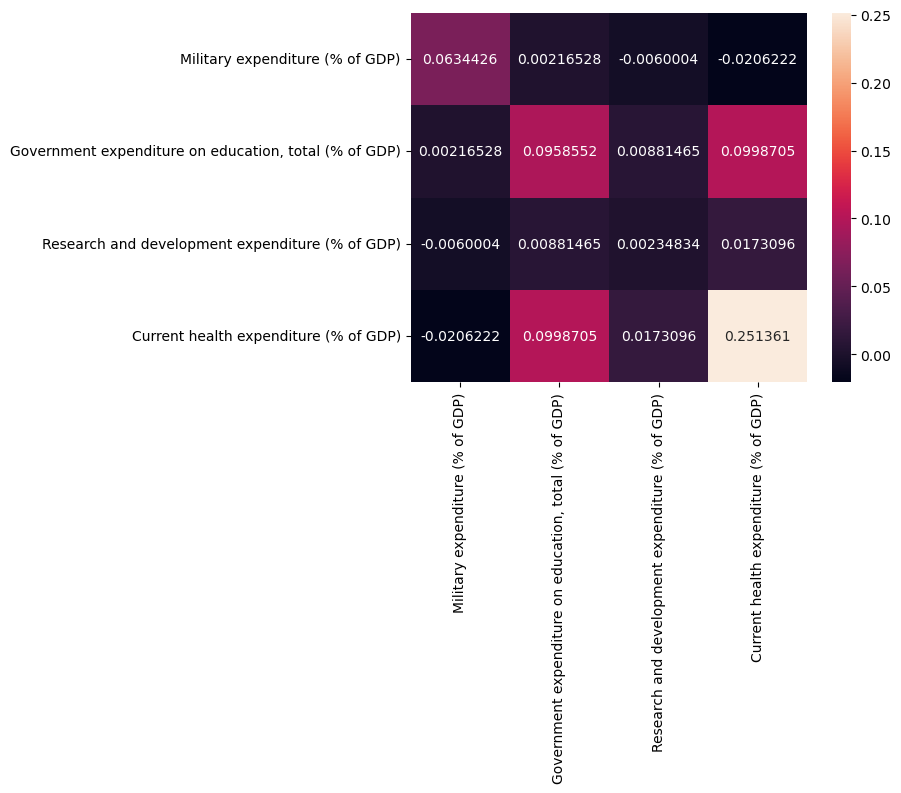

'\nfig1 = px.bar(dt, x="indice", y="& del PIB", animation_frame="año", animation_group="indice",\n            hover_name="indice",color=\'& del PIB\',range_y=[-1,8])\n\nfig = px.bar(df, x=tipos_de_gasto, y=\'x\', color=valor_GDP,\n  animation_frame=\'x\', animation_group = valor_GDP, range_y=[0,5])\nfig.show()\n'

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_covarianza = data2.cov()
matriz_covarianza = matriz_covarianza.drop(['x'], axis=1)
matriz_covarianza = matriz_covarianza.drop(['x'], axis=0)
sns.heatmap(matriz_covarianza, annot = True, fmt = 'g')
plt.show()

tipos_de_gasto = ['Military expenditure (% of GDP)','Government expenditure on education, total (% of GDP)','Research and development expenditure (% of GDP)','Current health expenditure (% of GDP)']
valor_GDP = [0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16]
#data2= data2.insert(5, 'Tipos de gasto', tipos_de_gasto, allow_duplicates=False,)
df = data2
'''
fig1 = px.bar(dt, x="indice", y="& del PIB", animation_frame="año", animation_group="indice",
            hover_name="indice",color='& del PIB',range_y=[-1,8])

fig = px.bar(df, x=tipos_de_gasto, y='x', color=valor_GDP,
  animation_frame='x', animation_group = valor_GDP, range_y=[0,5])
fig.show()
'''

## Matriz de correlacion 

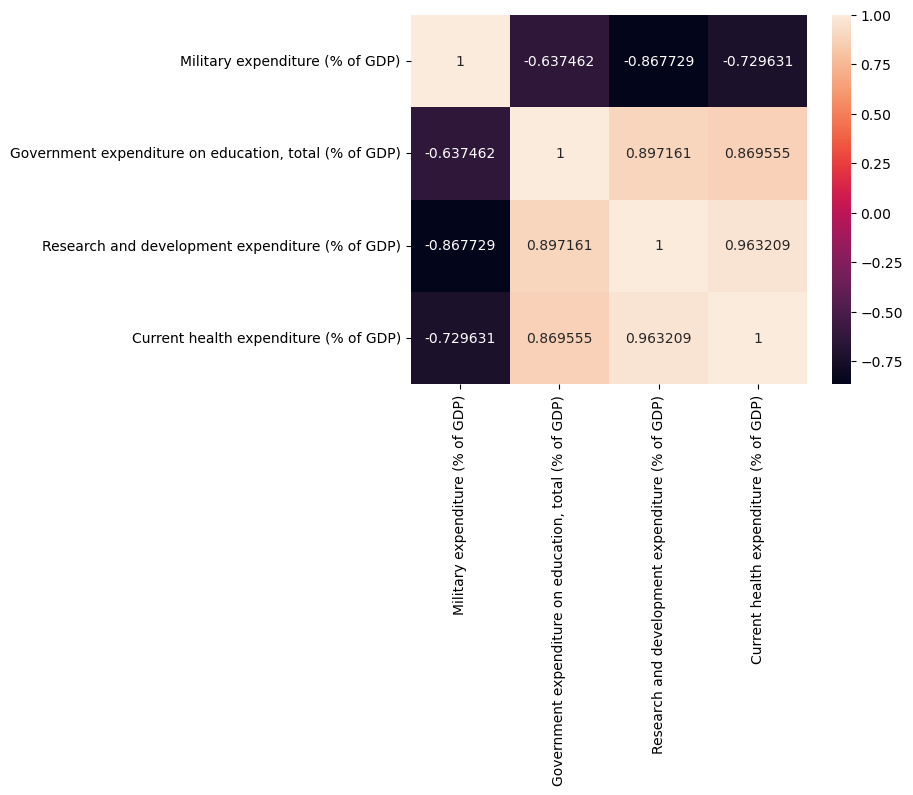

In [150]:
matriz_correlacion = matriz_covarianza.corr('pearson')
sns.heatmap(matriz_correlacion, annot = True, fmt = 'g')
plt.show() 
#fig4 = px.imshow(matriz_correlacion)

#fig4.show()